<img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/Effect_of_Pole_Location_in_a_Root_Locus_Plot.PNG" height=200 width=600>

### References
1. [Control Systems Engineering, 8th Edition](https://www.wiley.com/en-us/Control+Systems+Engineering%2C+8th+Edition-p-9781119474227)
2. [Wikipedia](https://en.wikipedia.org/wiki/Root_locus)
3. [Wikibook](https://en.wikibooks.org/wiki/Control_Systems/Root_Locus)

### Defination
The root locus of a feedback system is the graphical representation in the complex s-plane of the possible locations of its closed-loop poles for varying values of a certain system parameter.

### Import library

In [1]:
import numpy as np
import control as co
import matplotlib.pyplot as plt

In [2]:
import ipywidgets
from ipywidgets import FloatSlider, VBox, HBox, interactive_output
from IPython.display import display, IFrame

In [3]:
co.__version__

'0.9.0'

In [4]:
def pole_interact(K=0):
    poles=np.roots([1, 10, K])
    plt.figure(1,figsize=(8,5))
    plt.plot(poles.real,poles.imag, marker="x", color="red",
             linestyle='none',
             markersize=20, label=fr"$K={K}$")
    plt.axvline(x=0, color="b")
    plt.axhline(y=0, color="b")
    plt.grid()
    plt.legend()

In [5]:
%matplotlib inline
K=FloatSlider(value=0, min=0, max=50, step=5, description="K")
plot_inter=interactive_output(pole_interact, {"K": K})
layout=VBox([K, plot_inter])
display(layout)

* Settling time $T_s=\dfrac{4}{\zeta \omega_n}$
<br>
* Percent overshoot %OS = $exp\left(-\dfrac{\zeta \pi}{\sqrt{1-\zeta^2}}\right)\cdot100\%$
* Peak time $T_p = \dfrac{\pi}{\omega_n \sqrt{1-\zeta^2}}$

### Some observation from `pole_interact`plot
1. Directing our attention to the underdamped portion of the root locus, we see that regardless of the value of gain, the real parts of the complex poles are always the same. Since the settling time is inversely proportional to the real part of the complex poles for this second-order system, the conclusion is that regardless of the value of gain, the settling time for the system remains the same under all conditions of underdamped responses.

2. As we increase the gain, the damping ratio diminishes, and the percent overshoot increases.

3. The damped frequency of oscillation, which is equal to the imaginary part of the pole, also increases with an increase in gain, resulting in a reduction of the peak time.

4. Finally, since the root locus never crosses over into the right half-plane, the system is always stable

Closed loop transfer function $$\dfrac{C(s)}{R(s)}=\dfrac{K}{s^2+10s+K}$$

<IPython.core.display.Javascript object>


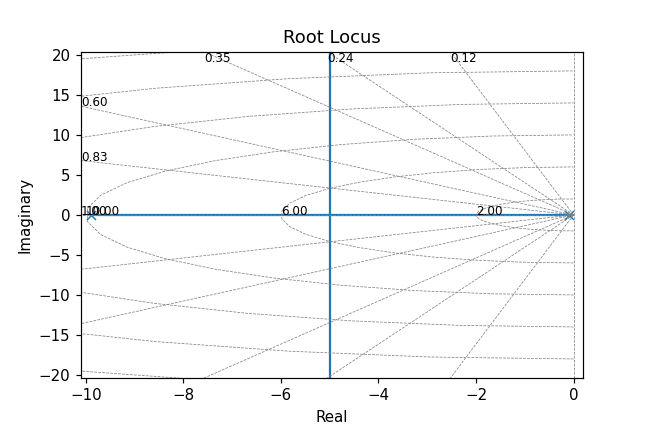

In [6]:
%matplotlib notebook
s=co.tf('s')
G = 1/(s**2+10*s+1)
plt.figure(1)
co.root_locus(G, kvec=np.linspace(0,50,1000), 
             plot=True);

### Properties of the Root Locus
As we change gain, we notice that the system poles and zeros actually move around in the S-plane. This fact can make life particularly difficult, when we need to solve higher-order equations repeatedly, for each new gain value. The solution to this problem is a technique known as Root-Locus graphs. Root-Locus allows you to graph the locations of the poles and zeros for every value of gain, by following several simple rules.
<img src="https://github.com/sayedul79/python-control-system/blob/main/image/closed-loop-system.PNG?raw=true">
Closed loop Transfer function$$T(s)=\dfrac{KG(s)}{1+KG(s)H(s)}$$
Thus, the closed-loop poles of the closed-loop transfer function are the roots of the characteristic equation 
$$
\begin{eqnarray}
1+KG(s)H(s) &=& 0\\
G(s)H(s) &=& \dfrac{-1}{K}\\
G(s)H(s) &=& \dfrac{1}{K}\angle \pi\\
G(s)H(s) &=& \dfrac{1}{K}\angle (2n+1)\pi\\
\end{eqnarray}
$$
So angle condition is :$$\angle G(s)H(s)=\angle (2n+1)\pi$$
And magnitude condition is : $$\left|G(s)H(s)\right|=\dfrac{1}{K}$$

### [Root Locus Rules](https://en.wikibooks.org/wiki/Control_Systems/Root_Locus#Root_Locus_Rules)
Here is the complete set of rules for drawing the root-locus graph. We will use P and Z to denote the number of poles and the number of zeros of the open-loop transfer function, respectively. We will use $P_i$ and $Z_i$ to denote the location of the ith pole and the ith zero, respectively. Likewise, we will use $\Psi_i$ and $\rho_i$ to denote the angle from a given point to the ith pole and zero, respectively. All angles are given in radians (π denotes π radians).


There are 11 rules that, if followed correctly, will allow you to create a correct root-locus graph.



1. There is one branch of the root-locus for every root of b(s).


2. The roots of b(s) are the poles of the open-loop transfer function. Mark the roots of b(s) on the graph with an X.


3. The roots of a(s) are the zeros of the open-loop transfer function. Mark the roots of a(s) on the graph with an O. There should be a number of O's less than or equal to the number of X's. There is a number of zeros p - z located at infinity. These zeros at infinity are called "implicit zeros". All branches of the root-locus will move from a pole to a zero (some branches, therefore, may travel towards infinity).


4. A point on the real axis is a part of the root-locus if it is to the left of an odd number of poles and zeros.


5. The gain at any point on the root locus can be determined by the inverse of the absolute value of the magnitude equation.
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e41bc8bb43c60c3f0e336a0599a72ff341c6b13e">


6. The root-locus diagram is symmetric about the real-axis. All complex roots are conjugates.


7. Two roots that meet on the real-axis will break away from the axis at certain break-away points. If we set s → σ (no imaginary part), we can use the following equation:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bc7d13d548918516e36fb9bc1d6428509cb62e66">
And differentiate to find the local maximum:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/46ba2f47811f92835585b371908962a4c27590b8">


8. The breakaway lines of the root locus are separated by angles of $\displaystyle \dfrac {\pi }{\alpha }$, where $\alpha$ is the number of poles intersecting at the breakaway point.


9. he breakaway root-loci follow asymptotes that intersect the real axis at angles φω given by:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/427004d1f07fd972fd366cb82b8ce9fb504c02ef">


The origin of these asymptotes, OA, is given as the sum of the pole locations, minus the sum of the zero locations, divided by the difference between the number of poles and zeros:
$$OA=\dfrac{Re\left(\sum_{P}P_i-\sum_{Z}Z_i\right)}{P-Z}$$


10. The branches of the root locus cross the imaginary axis at points where the angle equation value is π (i.e., $180^\circ$).


11. The angles that the root locus branch makes with a complex-conjugate pole or zero is determined by analyzing the angle equation at a point infinitessimally close to the pole or zero. The angle of departure, $\phi_d$ is given by the following equation:
$$\sum_{P}\Psi_i+\sum_{Z}\rho_i+\phi_d=\pi$$
The angle of arrival, $\phi_a$, is given by:
$$\sum_{P}\Psi_i+\sum_{Z}\rho_i+\phi_a=\pi$$

### Number of Asymptotes
If the number of explicit zeros of the system is denoted by Z (uppercase z), and the number of poles of the system is given by P, then the number of asymptotes $(N_a)$ is given by:


Let $P$ be the number of poles and $Z$ be the number of zeros:
$$N_a=P-Z$$
The angles of the asymptotes are given by:
$$\phi_n=(2n+1)\dfrac{\pi}{P-Z}$$
for values of $ n=[0,1,...N_{a}-1]$
<br>
**The angles for the asymptotes are measured from the positive real-axis**

### Asymptote Intersection Point
The asymptotes intersect the real axis at the point:


origin of the asymptotes
$$\sigma_0=\dfrac{\sum_{P}-\sum_{Z}}{P-Z}$$
Where $ \sum _{P}$ is the sum of all the locations of the poles, and $\sum _{Z}$ is the sum of all the locations of the explicit zeros.

### Breakaway Points
The breakaway points are located at the roots of the following equation:
$$\dfrac{dG(s)H(s)}{ds}=0$$

Once you solve for $s$, the real roots give you the breakaway/reentry points. Complex roots correspond to a lack of breakaway/reentry.

### Root Locus and Stability
The root locus procedure should produce a graph of where the poles of the system are for all values of gain K. When any or all of the roots of Denominator are in the unstable region, the system is unstable. When any of the roots are in the marginally stable region, the system is marginally stable (oscillatory). When all of the roots of Denominator are in the stable region, then the system is stable.


It is important to note that a system that is stable for gain K1 may become unstable for a different gain K2. Some systems may have poles that cross over from stable to unstable multiple times, giving multiple gain values for which the system is unstable.


### Sketching root locus
Using a few basic rules, the root locus method can plot the overall shape of the path (locus) traversed by the roots as the value of $K$ varies. The plot of the root locus then gives an idea of the stability and dynamics of this feedback system for different values of $K$. The rules are the following:

* Mark open-loop poles and zeros
* Mark real axis portion to the left of an odd number of poles and zeros
* Find [asymptotes](https://en.wikipedia.org/wiki/Asymptote#Asymptotes_of_functions)


Let $P$ be the number of poles and $Z$ be the number of zeros:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e2bee544ae3137d84dbfda1372e26f256cd472aa">


The asymptotes intersect the real axis at $\alpha$  (which is called the centroid) and depart at angle $\phi$ given by:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ce6ceda6ea981d0858ad4a7d3485fc26ee1ef0a8">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0cd606d8751202953f1807d73a308a7107c259b5">


where $\displaystyle \sum_{P}$ is the sum of all the locations of the poles, $\displaystyle \sum_{Z}$ is the sum of all the locations of the explicit zeros and $Re()$ denotes that we are only interested in the real part.

* Phase condition on test point to find angle of departure
* Compute breakaway/break-in points

The breakaway points are located at the roots of the following equation:
$$\dfrac{dG(s)H(s)}{ds}=0$$

Once you solve for $s$, the real roots give you the breakaway/reentry points. Complex roots correspond to a lack of breakaway/reentry.

### Plotting root locus
Given the general closed-loop denominator rational polynomial
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a67df6358ee86dbf220b311c0f570265b12fd781">
the characteristic equation can be simplified to
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/adf02809d2faf80139bde137f5dbd084126327b0">


The solutions of $s$ to this equation are the root loci of the closed-loop transfer function

### Example
Given
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/47e116fc2c8f8996d83fbfd9295c9adbc9ccee5b">
we will have the characteristic equation
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/21bf174543572ca40402331708931c8e052f8873">
The following Python code will plot the root locus of the closed-loop transfer function as $K$ varies using the described manual method as well as the [`control.root_locus()`](https://python-control.readthedocs.io/en/0.8.3/generated/control.root_locus.html) built-in function:

<IPython.core.display.Javascript object>


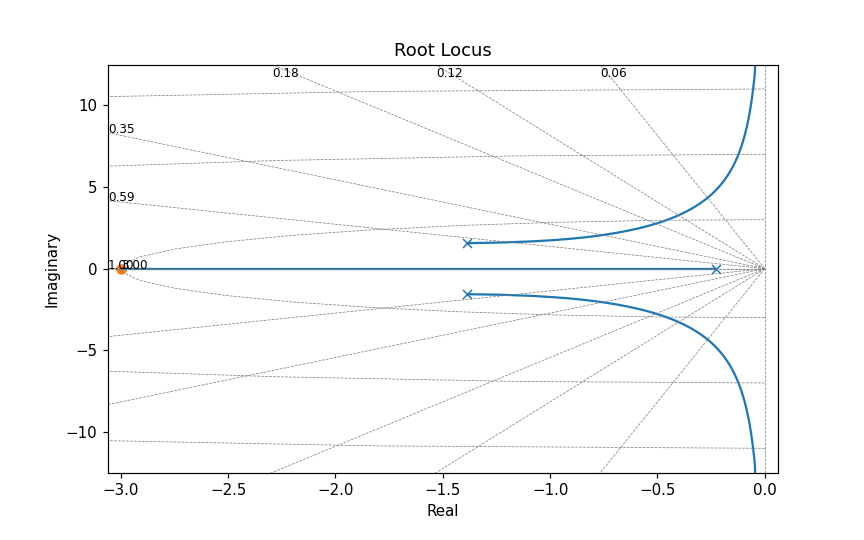

In [7]:
s=co.tf("s")
OLTF=(s+3)/(s**3+3*s**2+5*s+1)
plt.figure(2, figsize=(8,5))
co.root_locus(OLTF, plot=True);

$$T(s)=\dfrac{1}{(s+1)(s+2)(s+3)}$$ is this system stabel?

<IPython.core.display.Javascript object>


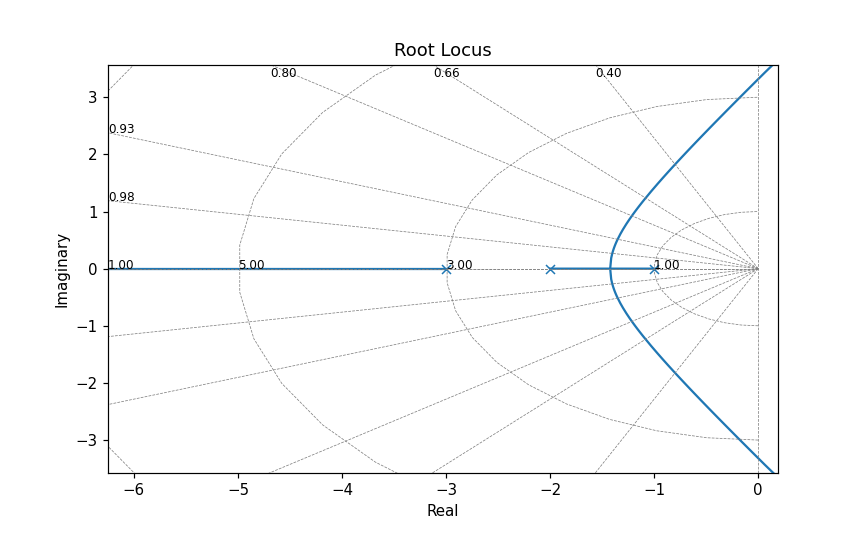

In [8]:
s=co.tf('s')
T=1/((s+1)*(s+2)*(s+3))
plt.figure(3, figsize=(8,5))
co.root_locus(T);

### Example: Complex-Conjugate Zeros
$$T(s)=\dfrac{s^2+4.5s+5.625}{s(s+1)(s+2)}$$

<IPython.core.display.Javascript object>


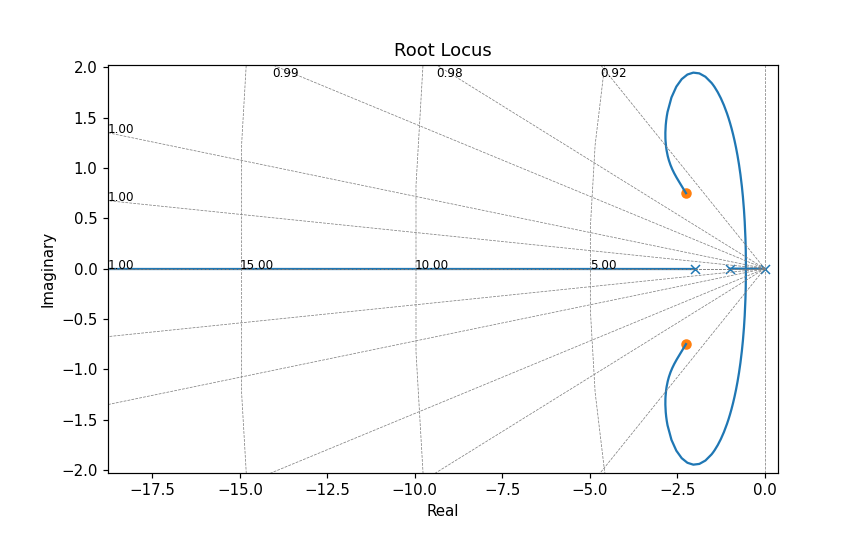

In [9]:
T=(s**2+4.5*s+5.625)/((s*(s+1)*(s+2)))
plt.figure(4, figsize=(8,5))
co.root_locus(T);